<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** = Aarsh Shah
* **UCID** = 30150079
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [77]:
# # Download the zip file using wget
# !wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# # Unzip wine.data from the downloaded zip file
# !unzip -o seeds.zip seeds_dataset.txt

# # Remove the downloaded zip file after extraction
# !rm -r seeds.zip

In [78]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

Text(-0.54, -0.6, '42 entries')

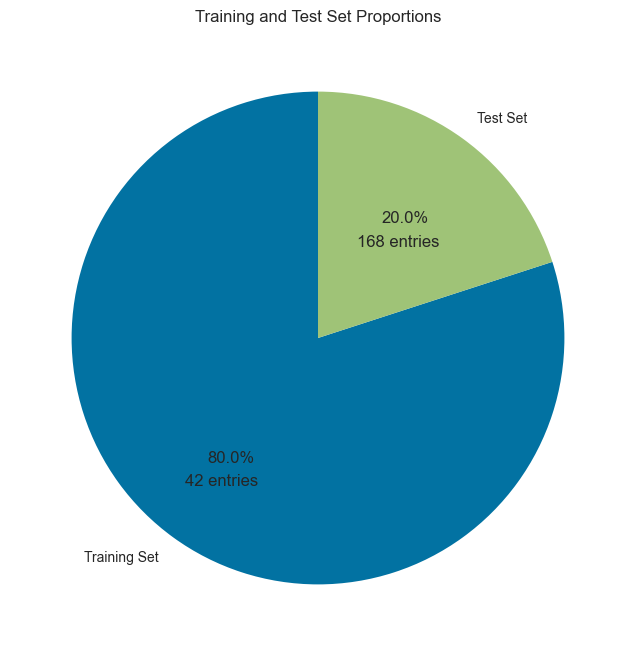

In [79]:
# 1.1
# Add necessary code here.

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = data.drop(columns = 'Type')
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

sizes = [len(y_train), len(y_test)]
labels = ['Training Set', 'Test Set']
plt.figure(figsize = (8, 8))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90)
plt.title('Training and Test Set Proportions')

plt.text(0.16, 0.37, f'{sizes[0]} entries', fontsize=12)
plt.text(-0.54, -0.6, f'{sizes[1]} entries', fontsize=12)

<font color='Green'><b>Answer:</b></font>

- **1.1** See code above

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


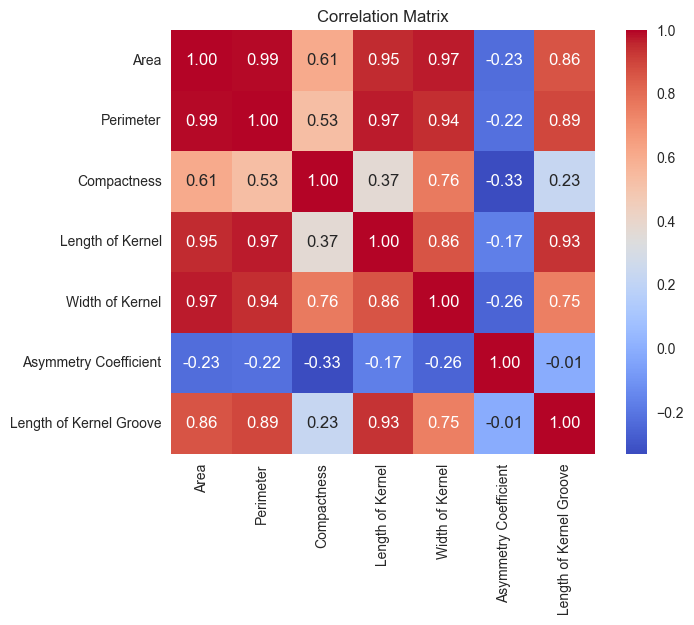

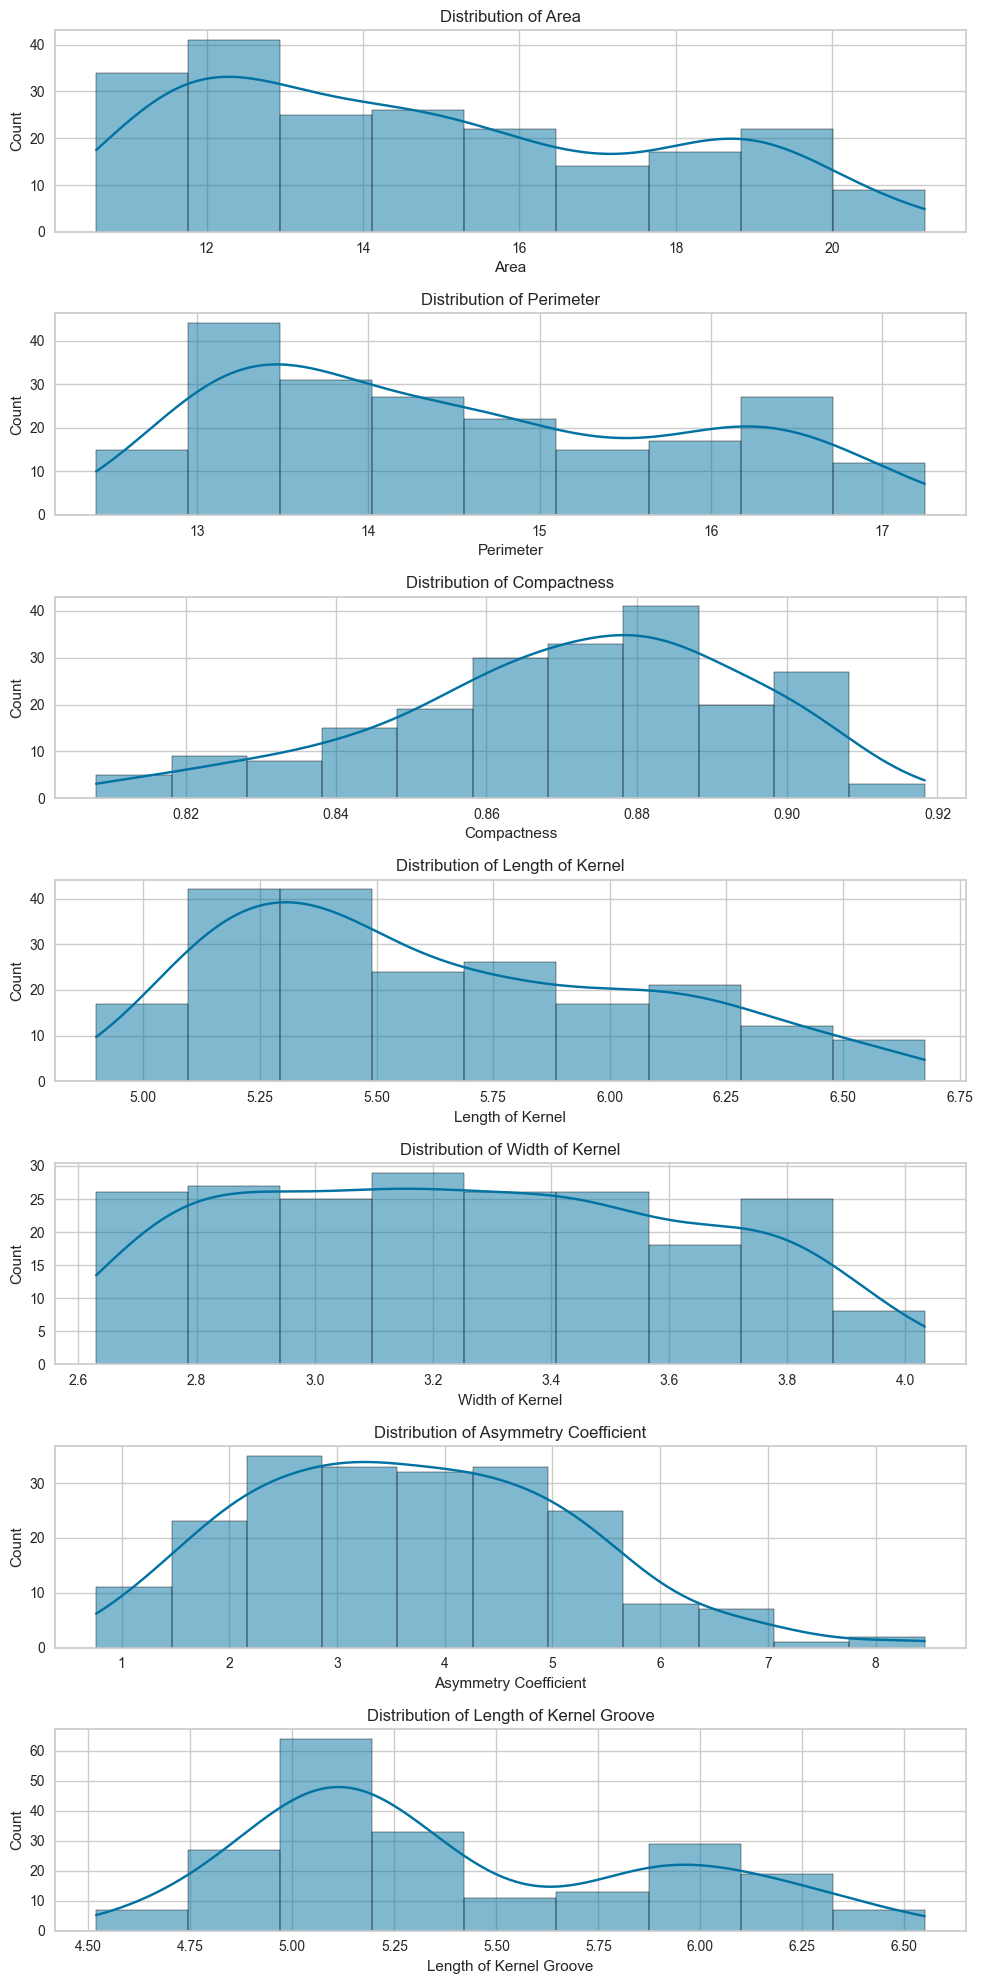

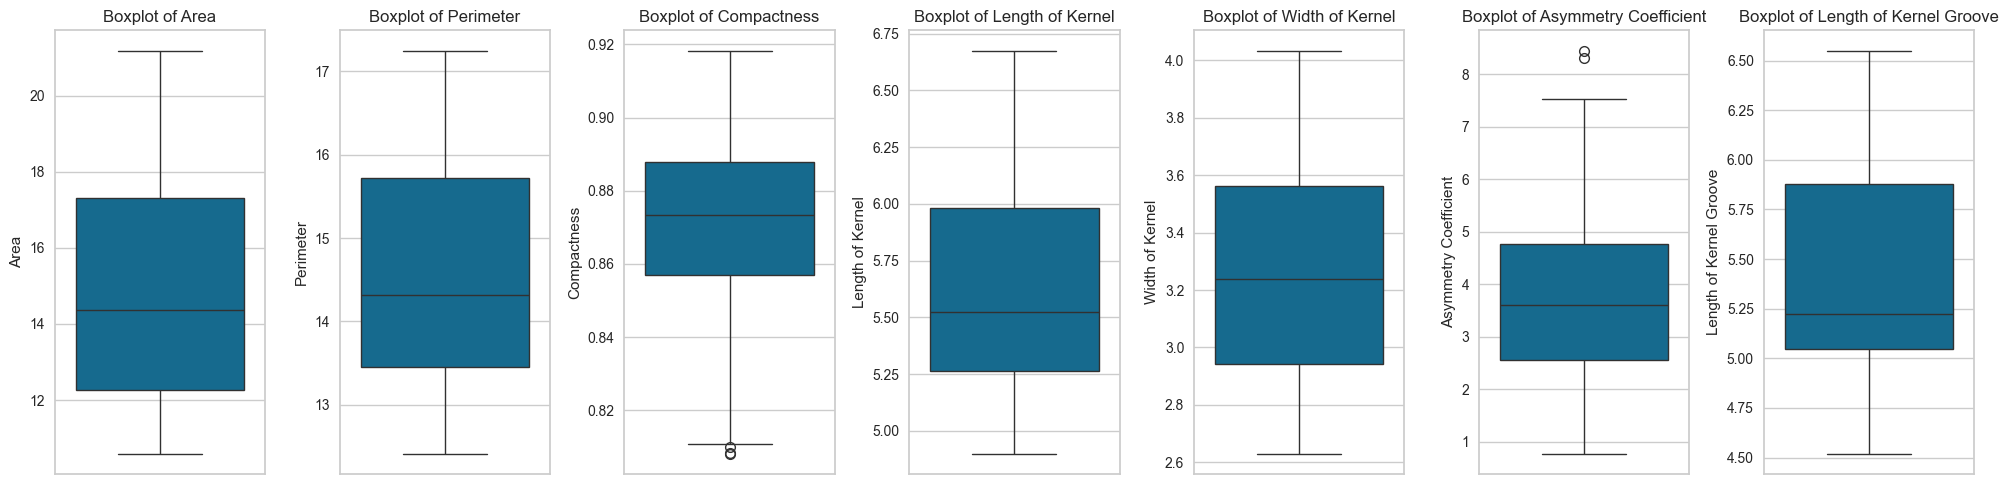

In [80]:
# Visualization to make a decision of which scalar to use
import seaborn as sns

def plot_feature_distributions(X):
    fig, axs = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(10, 20))
    for i, col in enumerate(X.columns):
        sns.histplot(X[col], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

def plot_box_plots(X):
    fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(20, 5))
    for i, col in enumerate(X.columns):
        sns.boxplot(y=X[col], ax=axs[i])
        axs[i].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


# correlation matrix
def plot_correlation_matrix(X):
    corr = X.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()
    
plot_correlation_matrix(X)
plot_feature_distributions(X)
plot_box_plots(X)

- **1.2 Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)

<font color='Green'><b>Answer:</b></font>

I have chosen to go with the MinMaxScaler 

Justification & Explanation: After researching multiple different scalars, the MinMaxScaler seems to be the most effective in this situation because it doesn't assume any specific distribution for the features and is therefore not influenced by the presence of multiple peaks or skewness. By looking at visualizations and the statistics above for the dataset I was able to see that some data of the data doesn't follow a Gaussian distribution while others have a skewed Gaussian distribution. In addition, looking at the box plots, the outliers don't seem to be a huge issue in the dataset thus the MinMaxScaler is still sufficient since it does not reduce the influence of outliers. Incorporating the MinMaxScaler is particularly beneficial for this dataset due to its ability to normalize the data within a specified range, typically [0, 1]. This characteristic is crucial when working with machine learning algorithms that are sensitive to the scale of the input features, as they will often perform better and converge faster when the features are on a similar scale. Given the multivariate nature of the wheat kernel data and its application in classification and clustering tasks, normalizing each feature to the same scale can help prevent any single feature from dominating the model due to its scale. Thus this will ensure that the geometric parameters of the kernels will contribute equally to the analysis, keeping a fair comparison across different wheat varieties.

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [81]:
# 1.3
# Add necessary code here.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

models = [LogisticRegression(max_iter=1000, random_state=0), SVC(max_iter=1000, random_state=0), RandomForestClassifier(random_state=0), KNeighborsClassifier(), DecisionTreeClassifier(random_state=0), GradientBoostingClassifier(random_state=0)]
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Decision Tree', 'Gradient Boosting']
for model, model_name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f'{model_name} Cross Validation Score: {scores.mean()}')
    

Logistic Regression Cross Validation Score: 0.9171122994652408
SVM Cross Validation Score: 0.9110516934046344
Random Forest Cross Validation Score: 0.8866310160427806
KNN Cross Validation Score: 0.9106951871657755
Decision Tree Cross Validation Score: 0.8625668449197861
Gradient Boosting Cross Validation Score: 0.904812834224599


<font color='Green'><b>Answer:</b></font>

- **1.3** Identify the model that you believe is most suitable for the dataset. Provide a justification for your choice based on the dataset's characteristics.

I have chosen the SVC (or support vector machine) model, as I believe it to be the most suitable for the dataset given for a number of reasons. First things first I ran a simple observation below checking the cross-validation score of each model to see what their scores were with a MinMaxScaler (the scaler I chose) and overall SVM, KNN, and Logistic Regression all performed very well (all around 91% with no parameter tuning). This helped me narrow the possible models down. Then looking at the dataset's characteristics, including the fact that it is multivariate shows the importance of geometric parameters for classification, further solidifies my choice of SVC. Support Vector Machines are particularly adept at handling situations where the decision boundaries between different wheat varieties may not be linearly separable (done through the kernel trick). Another compelling reason for choosing SVC is its robustness to overfitting, which is important when we want to classify kernels from new wheat varieties. Lastly, the SVC model's performance benefits significantly from feature scaling, which we have already addressed by choosing the MinMaxScaler. By ensuring that all features contribute equally to the distance calculation, we optimize the SVC's ability to create clear margins between classes.

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [86]:
# 1.4
# Add necessary code here.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


scalar = ('scaler', MinMaxScaler())
model = ('svc', SVC(random_state=0))

pipeline = Pipeline([
    scalar,
    model
])

param_grid = {
    'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto', 0.1, 1, 10, 100, 1000, 10000]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


print("Best parameters found:", grid_search.best_params_)
print("Best Training score:", grid_search.best_score_)
print("Test set score using the best model:", grid_search.score(X_test, y_test))

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best parameters found: {'svc__C': 0.0001, 'svc__gamma': 1000, 'svc__kernel': 'poly'}
Best Training score: 0.9702317290552586
Test set score using the best model: 0.9047619047619048


<font color='Green'><b>Answer:</b></font>

- **1.4**

- The best score for the pipeline is 97.02%, with the following parameters:
    - 'svc__C': 0.0001
    - 'svc__gamma': 1000
    - 'svc__kernel': 'poly'
- Additionaly the score with the test set is 90.5% when using the best model in the grid search

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [88]:
# 1.5
# Add necessary code here.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid2 = {
    'svc__C': [ 0.001, 0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto', 0.1, 1, 10, 100]
}

grid_search2 = GridSearchCV(pipeline, param_grid2, cv=5, n_jobs=-1, verbose=2)
grid_search2.fit(X_train_pca, y_train)

print("Best parameters found:", grid_search2.best_params_)
print("Best score:", grid_search2.best_score_)
print("Test set score using the best model:", grid_search2.score(X_test_pca, y_test))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best score: 0.9049910873440284
Test set score using the best model: 0.8809523809523809


<font color='Green'><b>Answer:</b></font>

- **1.5** 

Justify your selection based on the characteristics of the seeds dataset.

- I've chosen PCA for dimensionality reduction in this dataset because it's more aligned with the linear nature of the data, as revealed by numerous visualizations. At the top of this assignment, I created many plots, one of which is the correlation matrix, which showed that most features had a relationship (as most values were over 0.5 with many of them being close to 1). As so, PCA thrives on linear relationships, as it efficiently condenses the information into fewer dimensions without losing significant details, as this dataset has 7, its able to take those correlations and reduce them to 2 dimensions. On the other hand, t-SNE, while powerful for uncovering non-linear patterns, is less effective and more computationally demanding in scenarios where the data predominantly exhibit linear correlations, as is the case here. This makes PCA not only more suitable but also more straightforward for reducing dimensionality while preserving the essence of the dataset.

Compare the model's performance with the original higher-dimensional data.

- The lower dimensional data actually performs considerably worse than the higher dimensional data. For PCA the test score was 90.5% for the training set and 88% for the test set, but the fully featured data had a training score of over 97% and a test score of 90.5%. This difference can potentially be attributed to the richness of information preserved in the full feature space. The seeds dataset likely contains intricate patterns and relationships between features that are crucial for accurate classification. While dimensionality reduction techniques like PCA are excellent for visualization and can help to reveal clusters or underlying structures, they may also discard some of the variance and complex relationships between variables in the process. Furthermore, the model trained on the original dataset has access to all these subtle cues and distinctions between classes, enabling more accurate predictions and a higher cross-validation score. Thus this highlights the trade-off between preserving information and simplifying data representation.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

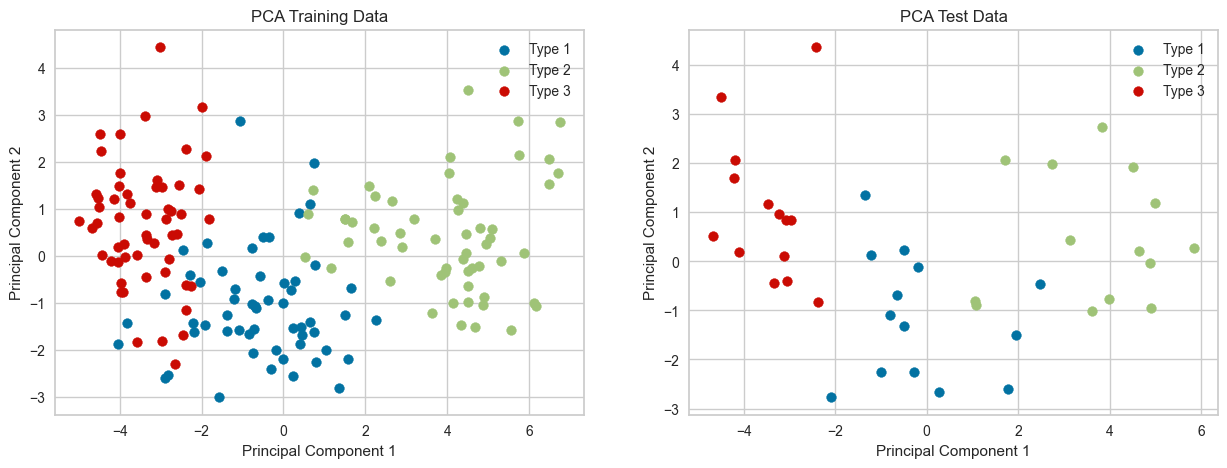

In [98]:
# 1.6
# Add necessary code here.

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
for i in range(1, 4):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=f'Type {i}')
    

plt.title('PCA Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

#  create another plot with the test data
plt.subplot(1, 2, 2)
for i in range(1, 4):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=f'Type {i}')

plt.title('PCA Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

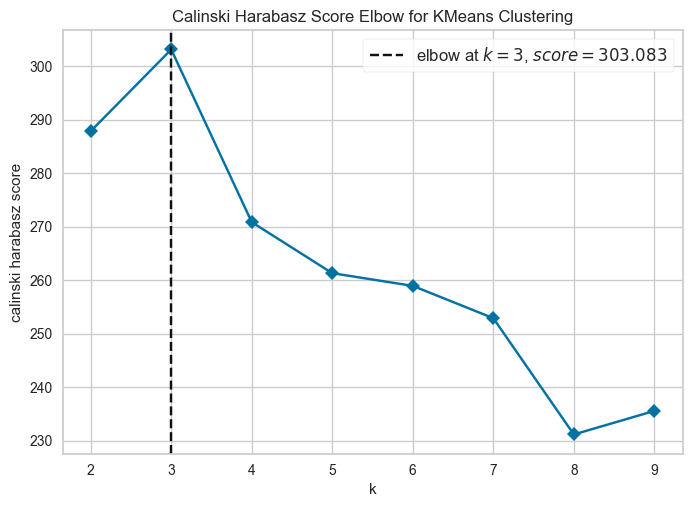

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('kmeans', KMeans(random_state=0))
])

visualizer = KElbowVisualizer(pipeline['kmeans'], k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(X_train)
visualizer.show()

<font color='Green'><b>Answer:</b></font>

- **2.1** Explain the results of the `KelbowVisualizer`.

Looking at the results of the KelboowVisualizer plot it shows us the Calinski-Harabasz score on the y-axis against the number of clusters (k) on the x-axis. The KElbowVisualizer automatically calculates the 'elbow' point which indicates the optimal number of clusters, which is where the increase in score slows down significantly. The elbow point is considered the optimal number of clusters because it represents a balance between maximizing the Calinski-Harabasz score, which indicates well-defined clusters, and minimizing the number of clusters. Beyond this point, increasing the number of clusters leads to diminishing returns in score improvement, implying that additional clusters do not significantly enhance the clarity or separation of the data grouping. In this case, the elbow is clearly identified at k=3, with a Calinski-Harabasz score of 303.083, suggesting that three clusters provide a well-defined clustering solution for the data.

**Assumption**
- I created a pipeline but KElbowVisualizer only takes a model as an input, thus as so I only passed it to the KMeans models, without any scaled data.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [91]:
# 2.2
# Add necessary code here.

pipeline_with_optimal_k = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=1))
])
# Fit the pipeline to the training data
pipeline_with_optimal_k.fit(X_train)
labels = pipeline_with_optimal_k.predict(X_train)

X_train_labeled = X_train.copy()
X_train_labeled['Cluster_Label'] = labels

print(X_train_labeled.head())

      Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
36   16.20      15.27       0.8734             5.826            3.464   
60   11.42      12.86       0.8683             5.008            2.850   
105  18.83      16.29       0.8917             6.037            3.786   
46   15.36      14.76       0.8861             5.701            3.393   
189  10.59      12.41       0.8648             4.899            2.787   

     Asymmetry Coefficient  Length of Kernel Groove  Cluster_Label  
36                   2.823                    5.527              1  
60                   2.700                    4.607              2  
105                  2.553                    5.879              0  
46                   1.367                    5.132              1  
189                  4.975                    4.794              2  


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [96]:
# 2.3
# Add necessary code here.

from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

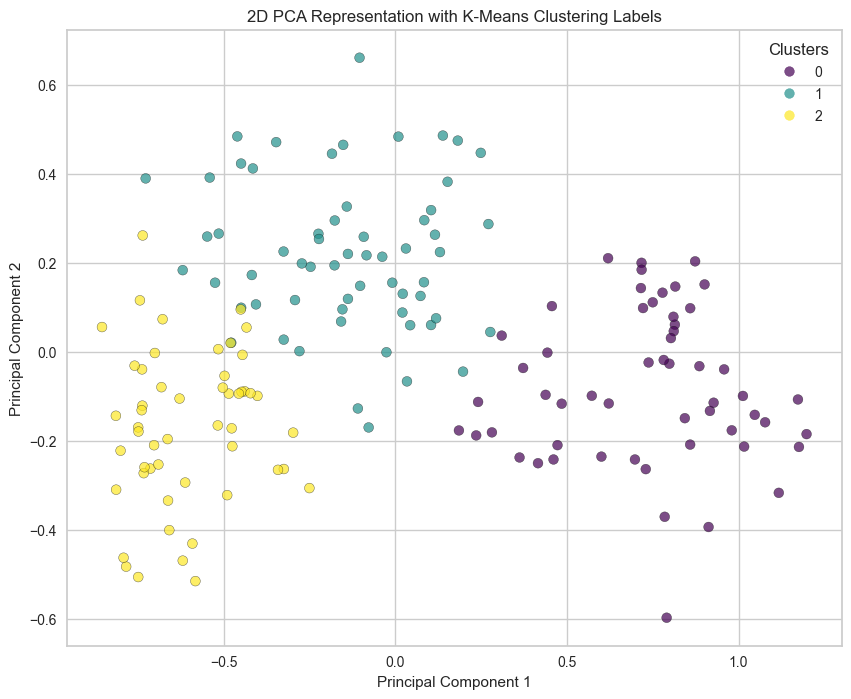

In [97]:
# 2.4
# Add necessary code here.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, alpha=0.7)

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('2D PCA Representation with K-Means Clustering Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question**

In interpreting the results of the clustering and 2D PCA plot it is important to look at various characteristics including cluster separation, density, and the size of them. Looking at the 3 different labels that have been produced, specifically the yellow, blue, and purple clusters are clearly separated into distinct groups, with little overlap near the edges of purple & blue and yellow & blue. This makes it clear that the groups are distinguishable. Additionally, looking at the density of the yellow cluster it is significantly higher than the purple and blue clusters, which are much more spread out, This tells us the yellow cluster has a much more well-defined grouping in the dataset, but the other two have less cohesion. The purple dataset also seems to have some special cases as there are some outliers in the bottom corner. Lastly looking at the shape and size of the clusters can give us more insight into the patterns of the dataset. Here the clusters in the plot don't have any distinct shape, in fact, there may even be the presence of some sub-clusters. However, the size of the 3 clusters is quite similar, indicating that no one cluster is inherently more dominant than the other. Overall the PCA provides us with a simplified view of the dataset's structure giving us context into the overall relationships that may exist.